In [72]:
import pandas as pd
file_path = '/home/slides/datasets/adult/adult.data'
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
df = pd.read_csv(file_path, header=None, names=column_names, na_values=" ?", skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [73]:
print(df.head().to_markdown(index=False))

|   age | workclass        |   fnlwgt | education   |   education-num | marital-status     | occupation        | relationship   | race   | sex    |   capital-gain |   capital-loss |   hours-per-week | native-country   | income   |
|------:|:-----------------|---------:|:------------|----------------:|:-------------------|:------------------|:---------------|:-------|:-------|---------------:|---------------:|-----------------:|:-----------------|:---------|
|    39 | State-gov        |    77516 | Bachelors   |              13 | Never-married      | Adm-clerical      | Not-in-family  | White  | Male   |           2174 |              0 |               40 | United-States    | <=50K    |
|    50 | Self-emp-not-inc |    83311 | Bachelors   |              13 | Married-civ-spouse | Exec-managerial   | Husband        | White  | Male   |              0 |              0 |               13 | United-States    | <=50K    |
|    38 | Private          |   215646 | HS-grad     |               9 | Divo

| C        |   GPA |   Interview Score |
|:---------|------:|------------------:|
| square   |    10 |                10 |
| triangle |    19 |                19 |
| C        |   GPA |   Interview Score |
|:---------|------:|------------------:|
| square   |    46 |                46 |
| triangle |    25 |                25 |
|     GPA |   Interview Score | C        |
|--------:|------------------:|:---------|
| 3.7454  |          0.314292 | square   |
| 9.50714 |          6.3641   | triangle |
| 7.31994 |          3.14356  | triangle |
| 5.98658 |          5.08571  | square   |
| 1.56019 |          9.07566  | square   |


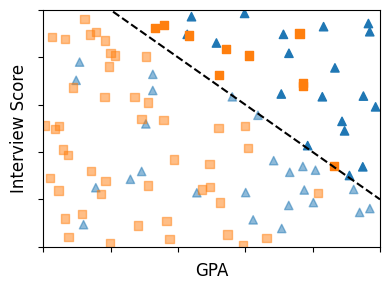

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate dataset
n_points = 100

A = np.random.uniform(0, 10, n_points)  # Random values for A between 0 and 10
B = np.random.uniform(0, 10, n_points)  # Random values for B between 0 and 10
# Correct the probabilities calculation
prob_triangle = A / 10  # Probability of being a triangle increases with A
prob_square = 1 - prob_triangle  # Probability of being a square
probabilities = np.column_stack((prob_triangle, prob_square))

# Assign C using row-wise probabilities
C = [np.random.choice(['triangle', 'square'], p=p) for p in probabilities]

# Create a DataFrame
data = pd.DataFrame({'GPA': A, 'Interview Score': B, 'C': C})

# Scatter plot
fig, ax = plt.subplots(figsize=(4, 3))


x_line = np.linspace(0, 10, 100)  # Generate x values
y_line = -x_line + 12  # Compute corresponding y values
ax.plot(x_line, y_line, 'k--', label='B = -A + 10')  # Add the line to the plot

for marker, group in zip(['^', 's'], ['triangle', 'square']):
    subset = data[data['C'] == group]
    ax.scatter(subset['GPA'], subset['Interview Score'], label=group, alpha=subset.apply(lambda x: 1 if (-x['GPA']+12) < x['Interview Score'] else 0.5, axis=1), marker=marker)

# Add labels and legend
# ax.set_title('Scatterplot of A vs B with C as Marker', fontsize=14)
ax.set_xlabel('GPA', fontsize=12)
ax.set_ylabel('Interview Score', fontsize=12)
ax.set_ylim([0, 10])
ax.set_xlim([0, 10])
ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.set_title('Classifier: $B = -A + 12$', fontsize=12)
fig.tight_layout()
fig.savefig("/home/slides/img/fairness/AB.svg")
fig.savefig("/home/slides/img/fairness/AB.pdf")
print(data[(-data['GPA']+12) < data['Interview Score']].groupby("C").count().to_markdown(index=True))
print(data[(-data['GPA']+12) > data['Interview Score']].groupby("C").count().to_markdown(index=True))
print(data.head().to_markdown(index=False))

/tmp/ipykernel_923/1046472260.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"A_{i}"] = np.concatenate([a_square, a_triangle])


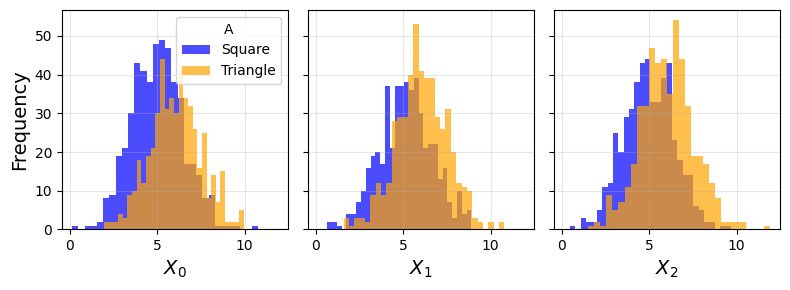

[0.5466666666666666,
 0.61,
 0.7233333333333334,
 0.7533333333333333,
 0.7833333333333333,
 0.8133333333333334,
 0.7833333333333333,
 0.8066666666666666,
 0.8066666666666666,
 0.8166666666666667,
 0.8066666666666666,
 0.8166666666666667,
 0.79,
 0.8266666666666667,
 0.8133333333333334,
 0.8166666666666667,
 0.8433333333333334,
 0.86,
 0.8466666666666667,
 0.84,
 0.8566666666666667,
 0.8733333333333333,
 0.8433333333333334,
 0.8766666666666667,
 0.8633333333333333,
 0.8833333333333333,
 0.9033333333333333,
 0.8933333333333333,
 0.8666666666666667,
 0.85,
 0.8833333333333333,
 0.8733333333333333,
 0.8533333333333334,
 0.8833333333333333,
 0.9033333333333333,
 0.8733333333333333,
 0.8866666666666667,
 0.91,
 0.8933333333333333,
 0.8733333333333333,
 0.91,
 0.8966666666666666,
 0.8633333333333333,
 0.8966666666666666,
 0.8933333333333333,
 0.91,
 0.9133333333333333,
 0.8633333333333333,
 0.92,
 0.9066666666666666,
 0.87,
 0.9,
 0.88,
 0.9166666666666666,
 0.93,
 0.89,
 0.8866666666666667,


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters for Gaussian distributions
mean_square = 5
std_square = 1.5
mean_triangle = 6
std_triangle = 1.5

# Number of samples
n_samples_square = 500
n_samples_triangle = 500

df = pd.DataFrame()
scores = []

fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
for i in range(0, 100):  # Generate data for each group
    a_square = np.random.normal(mean_square, std_square, n_samples_square)
    a_triangle = np.random.normal(mean_triangle, std_triangle, n_samples_triangle)

    # Create the dataset
    group_square = ['Square'] * n_samples_square
    group_triangle = ['Triangle'] * n_samples_triangle


    if i == 0:
        data = {
            f'A_{i}': np.concatenate([a_square, a_triangle]),
            'GROUP': group_square + group_triangle
        }
        df = pd.DataFrame(data)

    else:
        df[f"A_{i}"] = np.concatenate([a_square, a_triangle])

    if i < 3:
        # Plot the data distribution by group
        for group, color in zip(['Square', 'Triangle'], ['blue', 'orange']):
            group_data = df[df['GROUP'] == group]
            axs[i].hist(group_data[f'A_{i}'], bins=30, alpha=0.7, label=group, color=color)

        # plt.title('Distribution of A by Group', fontsize=16)
        axs[i].set_xlabel(f'$X_{i}$', fontsize=14)
        if i == 0:
            axs[i].set_ylabel('Frequency', fontsize=14)
            axs[i].legend(title="A", fontsize=10)
        axs[i].grid(alpha=0.3)

    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier

    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import classification_report, accuracy_score

    # Simulated dataset creation (if not already created)
    X = df[[x for x in df.columns if x != "GROUP"]]
    y = df['GROUP']

    # 2. Encode the target
    from sklearn.preprocessing import LabelEncoder

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(random_state=42)
    clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    scores.append(accuracy)
    # Display the first few rows of the dataset
    df.head()

fig.tight_layout()
fig.savefig("/home/slides/img/fairness/A_dist.svg")
fig.savefig("/home/slides/img/fairness/A_dist.pdf")
plt.show()
scores


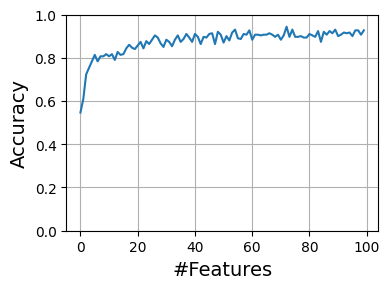

In [81]:
fig, axs = plt.subplots(1, 1, figsize=(4, 3), sharex=True, sharey=True)
axs.plot(range(0, len(scores)), scores)

df_scores = pd.DataFrame(scores, columns=["Accuracy"])
df_scores["i"] = range(0, len(scores))

# df_scores["Accuracy"].rolling(window=3).mean().plot(ax=axs)
axs.grid()
axs.set_ylim([0, 1])
axs.set_xlabel(f'#Features', fontsize=14)
axs.set_ylabel(f'Accuracy', fontsize=14)

fig.tight_layout()
fig.savefig("/home/slides/img/fairness/A_accuracy.svg")
fig.savefig("/home/slides/img/fairness/A_accuracy.pdf")

In [77]:
df["target"] = df["GROUP"].apply(lambda x: 1 if x == "Triangle" else 0)

new_scores = []

for i in range(0, len(scores)):
    X = df[[x for x in df.columns if (x != "GROUP" and x != "target" and int(x.split("_")[1]) <= i)]]
    y = df['target']
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
    clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    new_scores.append(accuracy)

new_scores

/tmp/ipykernel_923/3921314819.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["target"] = df["GROUP"].apply(lambda x: 1 if x == "Triangle" else 0)


[0.5466666666666666,
 0.61,
 0.7233333333333334,
 0.7533333333333333,
 0.7833333333333333,
 0.8133333333333334,
 0.7833333333333333,
 0.8066666666666666,
 0.8066666666666666,
 0.8166666666666667,
 0.8066666666666666,
 0.8166666666666667,
 0.79,
 0.8266666666666667,
 0.8133333333333334,
 0.8166666666666667,
 0.8433333333333334,
 0.86,
 0.8466666666666667,
 0.84,
 0.8566666666666667,
 0.8733333333333333,
 0.8433333333333334,
 0.8766666666666667,
 0.8633333333333333,
 0.8833333333333333,
 0.9033333333333333,
 0.8933333333333333,
 0.8666666666666667,
 0.85,
 0.8833333333333333,
 0.8733333333333333,
 0.8533333333333334,
 0.8833333333333333,
 0.9033333333333333,
 0.8733333333333333,
 0.8866666666666667,
 0.91,
 0.8933333333333333,
 0.8733333333333333,
 0.91,
 0.8966666666666666,
 0.8633333333333333,
 0.8966666666666666,
 0.8933333333333333,
 0.91,
 0.9133333333333333,
 0.8633333333333333,
 0.92,
 0.9066666666666666,
 0.87,
 0.9,
 0.88,
 0.9166666666666666,
 0.93,
 0.89,
 0.8866666666666667,


(0.0, 1.0)

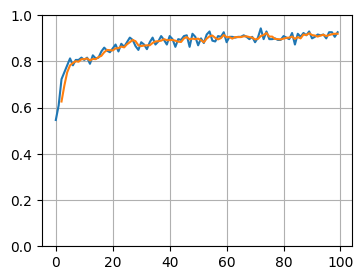

In [78]:
fig, axs = plt.subplots(1, 1, figsize=(4, 3), sharex=True, sharey=True)
axs.plot(range(0, len(new_scores)), new_scores)

df_scores = pd.DataFrame(scores, columns=["Accuracy"])
df_scores["i"] = range(0, len(scores))

df_scores["Accuracy"].rolling(window=3).mean().plot(ax=axs)
axs.grid()
axs.set_ylim([0, 1])

In [79]:
print(df[["A_0", "A_1", "A_2", "GROUP"]].loc[498:501].to_markdown(index=False))

|     A_0 |     A_1 |     A_2 | GROUP    |
|--------:|--------:|--------:|:---------|
| 3.68657 | 6.53609 | 6.18556 | Square   |
| 2.9258  | 5.88879 | 5.51008 | Square   |
| 7.38927 | 7.16754 | 6.85592 | Triangle |
| 8.86412 | 5.17322 | 7.45228 | Triangle |
